# 简介

数据为一家大型全球性超市2011 - 2014年四年的销售数据<br>
数据来源: kaggle<br>
数据集下载地址: <a href='https://www.kaggle.com/jr2ngb/superstore-data'>https://www.kaggle.com/jr2ngb/superstore-data</a>

# 导包

In [2]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell

### 设置不显示报警信息

In [3]:
warnings.filterwarnings('ignore')

### 设置图显示中文

In [4]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

### 设置显示全部输出

In [5]:
InteractiveShell.ast_node_interactivity = "all"

# 导入数据

In [6]:
data = pd.read_csv('superstore_dataset2011-2015.csv', encoding='ISO-8859-1')

# 查看数据基本信息

In [7]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [8]:
data.shape

(51290, 24)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row ID            51290 non-null int64
Order ID          51290 non-null object
Order Date        51290 non-null object
Ship Date         51290 non-null object
Ship Mode         51290 non-null object
Customer ID       51290 non-null object
Customer Name     51290 non-null object
Segment           51290 non-null object
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Postal Code       9994 non-null float64
Market            51290 non-null object
Region            51290 non-null object
Product ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null float64
Shipping C

# 数据清洗

## 缺失值处理

In [10]:
# Postal Code 邮政编码,删掉就好
data.drop(columns=['Postal Code'], inplace=True)

In [11]:
data.isnull().sum().sum()

0

## 列名处理

In [12]:
# 列命名不规范,重置列名
data.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
data.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product_ID', 'Category', 'Sub-Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping_Cost', 'Order_Priority'],
      dtype='object')

## 数据类型处理

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
Row_ID            51290 non-null int64
Order_ID          51290 non-null object
Order_Date        51290 non-null object
Ship_Date         51290 non-null object
Ship_Mode         51290 non-null object
Customer_ID       51290 non-null object
Customer_Name     51290 non-null object
Segment           51290 non-null object
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Market            51290 non-null object
Region            51290 non-null object
Product_ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product_Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null float64
Shipping_Cost     51290 non-null float64
Order_Pri

In [14]:
data.head(1)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium


### 处理日期

In [15]:
# order_date 订购日期
data.Order_Date = pd.to_datetime(data.Order_Date)
# 随机抽样5个样本
data.Order_Date.sample(5)

14818   2014-03-12
15038   2014-04-06
3605    2012-01-05
28465   2013-01-18
13196   2013-12-12
Name: Order_Date, dtype: datetime64[ns]

In [16]:
# 增加年和月两列
data['Order_year'] = data.Order_Date.dt.year
data['Order_month'] = data.Order_Date.dt.month
data.Order_year.sample(5)
data.Order_month.sample(5)

12152    2013
15161    2014
14729    2014
3656     2012
31558    2013
Name: Order_year, dtype: int64

40805     5
50662     5
41452     9
2900     10
42230     2
Name: Order_month, dtype: int64

## 异常值处理

In [17]:
data.describe()
# 没有发现明显的异常值,利润最小值为负的六千多,属于正常范围

,Row_ID,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_year,Order_month
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,246.490581,3.476545,0.142908,28.610982,26.375915,2012.777208,7.143420
std,14806.29199,487.565361,2.278766,0.212280,174.340972,57.296804,1.098931,3.394749
min,1.00000,0.444000,1.000000,0.000000,-6599.978000,0.000000,2011.000000,1.000000
25%,12823.25000,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000,4.000000
50%,25645.50000,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000,7.000000
75%,38467.75000,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000,10.000000
max,51290.00000,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000,12.000000


## 查看重复值

In [18]:
data.duplicated().sum()

0

In [19]:
data.Segment.value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
Row_ID            51290 non-null int64
Order_ID          51290 non-null object
Order_Date        51290 non-null datetime64[ns]
Ship_Date         51290 non-null object
Ship_Mode         51290 non-null object
Customer_ID       51290 non-null object
Customer_Name     51290 non-null object
Segment           51290 non-null object
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Market            51290 non-null object
Region            51290 non-null object
Product_ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product_Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null float64
Shipping_Cost     51290 non-null float64
O

# 数据分析

## 整体销售情况

In [21]:
Sales_all_data = data[['Order_Date', 'Sales', 'Quantity', 'Profit', 'Order_year', 'Order_month']]
Sales_all_data.head()

,Order_Date,Sales,Quantity,Profit,Order_year,Order_month
0,2011-01-01,408.300,2,106.140,2011,1
1,2011-01-01,120.366,3,36.036,2011,1
2,2011-01-01,66.120,4,29.640,2011,1
3,2011-01-01,44.865,3,-26.055,2011,1
4,2011-01-01,113.670,5,37.770,2011,1


### 按照年月分组求和

In [22]:
Sales_all_year_data = Sales_all_data.groupby(['Order_year', 'Order_month']).sum()
Sales_all_year_data.head(5)
Sales_all_year_data.tail(5)

Sales  Quantity       Profit
Order_year Order_month                                     
2011       1            138241.30042      2178  13457.23302
           2            134969.94086      1794  17588.83726
           3            171455.59372      2183  16169.36062
           4            128833.47034      2181  13405.46924
           5            148146.72092      2057  14777.45792

Sales  Quantity       Profit
Order_year Order_month                                     
2014       8            432731.04194      5506  46443.47934
           9            405436.70584      5741  52533.83284
           10           406659.41500      5915  52342.49740
           11           508954.73156      7020  55561.72406
           12           427757.39800      6307  48920.76000

### 按年拆分表

In [23]:
Sales_2011_data = Sales_all_year_data.loc[2011].reset_index()
Sales_2012_data = Sales_all_year_data.loc[2012].reset_index()
Sales_2013_data = Sales_all_year_data.loc[2013].reset_index()
Sales_2014_data = Sales_all_year_data.loc[2014].reset_index()
Sales_2014_data

,Order_month,Sales,Quantity,Profit
0,1,268265.52240,3656,31447.74660
1,2,244159.30486,3450,29454.01876
2,3,347720.96868,4820,50097.04458
3,4,302132.54000,4397,35709.53320
4,5,304798.83604,4415,34335.60404
5,6,372577.23298,5528,40869.02108
6,7,278672.17326,3867,26450.70856
7,8,432731.04194,5506,46443.47934
8,9,405436.70584,5741,52533.83284
9,10,406659.41500,5915,52342.49740


## 构建分析函数

In [24]:
def func(data_list, data_name_list, field_name):
    # 构建表
    field_list = []
    for i in data_list:
        field_list.append(i[field_name])
    field = pd.concat(field_list, axis=1)
    field.columns = data_name_list
    field.index = data_list[0].Order_month
    
    # 各年汇总图
    field_sum = field.sum()
    field_sum.plot(kind='bar', alpha=0.7, width=0.5)
    plt.title('各年销量总额')
    plt.grid()
    
    # 各年增长率
    r1 = field_sum[1] / field_sum[0] - 1
    r2 = field_sum[2] / field_sum[1] - 1
    r3 = field_sum[3] / field_sum[2] - 1
    growth_rate = [0, r1, r2, r3]
    field_sum = pd.DataFrame({'sum':field_sum})
    field_sum['growth_rate'] = growth_rate
    
    # 绘制折线图观察趋势
    plt.figure(figsize=(10,8))
    plt.title('各年份各月销售额')
    for i in range(len(data_list)):
        plt.plot(data_list[i]['Order_month'], data_list[i][field_name], label=data_name_list[i])
    plt.legend()
    return field, field_sum

## 销售额分析

热力表:


,2011,2012,2013,2014
Order_month,,,,
1,138241,162801,206459,268266
2,134970,152661,191063,244159
3,171456,201609,230548,347721
4,128833,187470,233181,302133
5,148147,218960,304510,304799
6,189338,249290,341162,372577
7,162035,174394,223643,278672
8,219223,271670,323877,432731
9,255238,256568,326897,405437


Sales总计及年增长率表: 


,sum,growth_rate
2011,2.259451e+06,0.000000
2012,2.677439e+06,0.184995
2013,3.405746e+06,0.272017
2014,4.299866e+06,0.262533


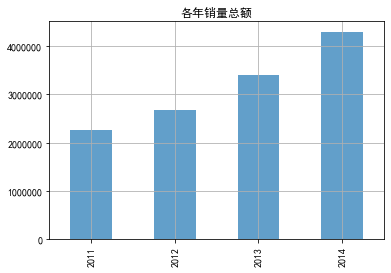

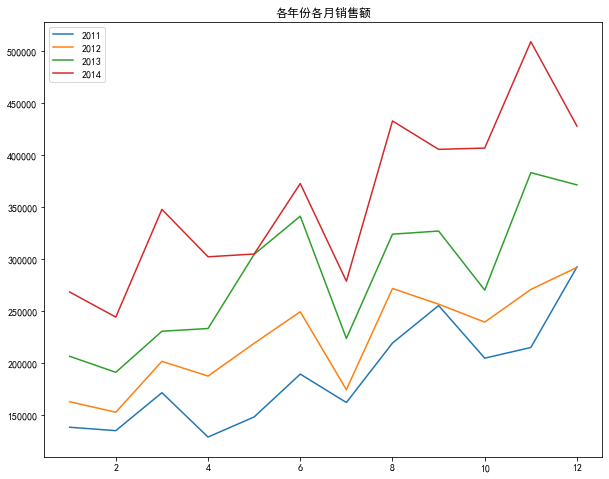

In [25]:
data_list = [Sales_2011_data, Sales_2012_data, Sales_2013_data, Sales_2014_data]
data_name_list = ['2011', '2012', '2013', '2014']
field_name = 'Sales'
# 调用分析函数
Sales,Sales_sum = func(data_list, data_name_list, field_name)
print('热力表:')
Sales.style.background_gradient()
print('%s总计及年增长率表: '%(field_name))
Sales_sum

从上诉表以及图中:<br>
销售额每年都在增长, 说明整体策略没有问题<br>
每年的上半年为淡季, 但六月份销售额很高<br>
每年的下半年为旺季, 但七月份的销售额很低<br>

## 销量分析

热力表:


,2011,2012,2013,2014
Order_month,,,,
1,2178,2150,2766,3656
2,1794,2156,2535,3450
3,2183,2880,3130,4820
4,2181,2506,3161,4397
5,2057,3239,4115,4415
6,2715,3508,4948,5528
7,2266,2551,3594,3867
8,2909,3451,4564,5506
9,3357,3752,5067,5741


Quantity总计及年增长率表: 


,sum,growth_rate
2011,31443,0.000000
2012,38111,0.212066
2013,48136,0.263047
2014,60622,0.259390


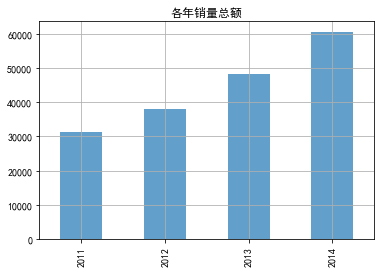

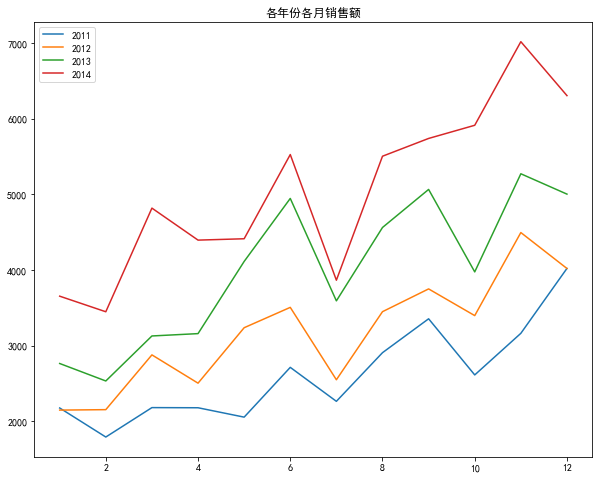

In [26]:
data_list = [Sales_2011_data, Sales_2012_data, Sales_2013_data, Sales_2014_data]
data_name_list = ['2011', '2012', '2013', '2014']
field_name = 'Quantity'
# 调用分析函数
Quantity,Quantity_sum = func(data_list, data_name_list, field_name)
print('热力表:')
Quantity.style.background_gradient()
print('%s总计及年增长率表: '%(field_name))
Quantity_sum

从上表和图中:<br>
销量与销售额完全成正比,逐年增加

## 利润分析

热力表:


,2011,2012,2013,2014
Order_month,,,,
1,13457.2,19627.4,26052.4,31447.7
2,17588.8,17828.2,31554,29454
3,16169.4,22752.9,34873.7,50097
4,13405.5,20804,26008.1,35709.5
5,14777.5,22865.4,39053.3,34335.6
6,25932.9,34358,43298.8,40869
7,10631.8,21725.2,27019.9,26450.7
8,19650.7,36511.4,32977.8,46443.5
9,32313.3,25039.9,18850.1,52533.8


Profit总计及年增长率表: 


,sum,growth_rate
2011,248940.81154,0.000000
2012,307415.27910,0.234893
2013,406935.23018,0.323731
2014,504165.97046,0.238934


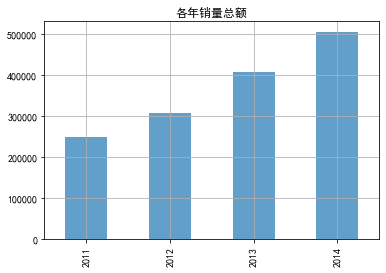

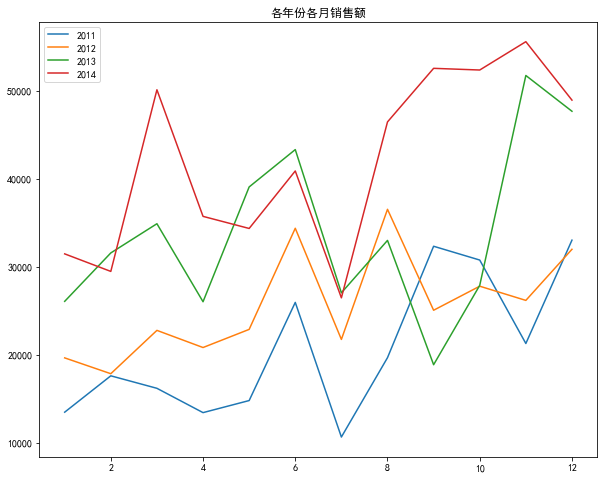

In [27]:
data_list = [Sales_2011_data, Sales_2012_data, Sales_2013_data, Sales_2014_data]
data_name_list = ['2011', '2012', '2013', '2014']
field_name = 'Profit'
# 调用分析函数
Profit,Profit_sum = func(data_list, data_name_list, field_name)
print('热力表:')
Profit.style.background_gradient()
print('%s总计及年增长率表: '%(field_name))
Profit_sum

从上面的表和图中:<br>
整体利润逐年提升,与销售额及销售量一致<br>
不一样的点在于,每年各月中利润起伏颇大,由于销量和销售额都比较平稳,大致推算出可能由于运费、成本有关

## 客户年均单消费分析

客户每年平均每单消费(一天的记为一单)

In [28]:
for i in range(2011, 2015):
    customer_data = data[data.Order_year == i]
    customer_data = customer_data[['Order_Date', 'Customer_ID','Sales']]
    # 计算一年总消费次数
    total_consumtion = customer_data.drop_duplicates(subset=['Order_Date', 'Customer_ID']).shape[0]
    # 均单消费
    avarge_consumtion = customer_data.Sales.sum()/total_consumtion
    print('%s年,总消费次数为: %s次'%(str(i), str(total_consumtion)))
    print('均单价: ',avarge_consumtion, end='\n\n')

2011年,总消费次数为: 4453次
均单价:  507.3997070604087

2012年,总消费次数为: 5392次
均单价:  496.55762136498515

2013年,总消费次数为: 6753次
均单价:  504.3308824788983

2014年,总消费次数为: 8696次
均单价:  494.4647965225392



每年的消费次数逐渐增高,每年增幅一千多次<br>
平均消费金额并没有增高,稳定在500±10之间

## 商品分析

### 热门商品

#### 购买次数TOP10

In [29]:
product_count = data.groupby(['Category', 'Product_ID']).agg({'Customer_ID' : 'count'}).sort_values('Customer_ID', ascending=False).reset_index().rename(columns={'Customer_ID':'count'}).iloc[:10, :]
product_count

,Category,Product_ID,count
0,Office Supplies,OFF-AR-10003651,35
1,Office Supplies,OFF-AR-10003829,31
2,Office Supplies,OFF-BI-10002799,30
3,Office Supplies,OFF-BI-10003708,30
4,Furniture,FUR-CH-10003354,28
5,Office Supplies,OFF-BI-10002570,27
6,Office Supplies,OFF-BI-10004140,25
7,Office Supplies,OFF-BI-10004195,24
8,Office Supplies,OFF-BI-10003650,24
9,Office Supplies,OFF-BI-10004632,24


销量前十大部分都是办公用品,消耗比较快

#### 销售额TOP10

In [30]:
product_sum = data.groupby(['Category', 'Product_ID']).agg({'Sales' : 'sum'}).sort_values('Sales', ascending=False).reset_index().rename(columns={'Sales':'Sales_sum'}).iloc[:10, :]
product_sum

,Category,Product_ID,Sales_sum
0,Technology,TEC-CO-10004722,61599.8240
1,Technology,TEC-PH-10004664,30041.5482
2,Office Supplies,OFF-BI-10003527,27453.3840
3,Technology,TEC-MA-10002412,22638.4800
4,Technology,TEC-PH-10004823,22262.1000
5,Furniture,FUR-CH-10002024,21870.5760
6,Furniture,FUR-CH-10000027,21329.7300
7,Office Supplies,OFF-AP-10004512,21147.0840
8,Furniture,FUR-TA-10001889,20730.7557
9,Office Supplies,OFF-BI-10001359,19823.4790


销售额前十大部分是电子、家具类，单价比较高

#### 利润TOP10

In [31]:
product_profit = data.groupby(['Category', 'Product_ID']).agg({'Profit' : 'sum'}).sort_values('Profit', ascending=False).reset_index().rename(columns={'Profit':'Profit_sum'}).iloc[:10, :]
product_profit

,Category,Product_ID,Profit_sum
0,Technology,TEC-CO-10004722,25199.9280
1,Office Supplies,OFF-AP-10004512,10345.5840
2,Technology,TEC-PH-10004823,8121.4800
3,Office Supplies,OFF-BI-10003527,7753.0390
4,Technology,TEC-CO-10001449,6983.8836
5,Furniture,FUR-CH-10002250,6123.2553
6,Technology,TEC-PH-10004664,5455.9482
7,Office Supplies,OFF-AP-10002330,5452.4640
8,Technology,TEC-PH-10000303,5356.8060
9,Furniture,FUR-CH-10002203,5003.1000


利润前十大部分为电子产品和家具类,单价高成本低,另一部分为办公用品,单价低销量高

通过上面三个表的分析,可以考虑提升电子产品和家具类的销量,可以更明显的提升利润

### 具体商品种类分析

In [32]:
product_data = pd.DataFrame(data[['Category', 'Sub-Category']].apply(lambda x : str(x[0].replace(' ', '_')) + '_' + str(x[1]), axis=1), columns=['Category_Sub_Category'])
product_data[['Sales', 'Profit']] = data[['Sales', 'Profit']]
product_data = product_data.groupby('Category_Sub_Category').sum().sort_values('Sales', ascending=False).reset_index()
product_data['Profit_margin(%)'] = product_data.Profit / product_data.Sales * 100
product_data

,Category_Sub_Category,Sales,Profit,Profit_margin(%)
0,Technology_Phones,1.706824e+06,216717.00580,12.697091
1,Technology_Copiers,1.509436e+06,258567.54818,17.130074
2,Furniture_Chairs,1.501682e+06,140396.26750,9.349269
3,Furniture_Bookcases,1.466572e+06,161924.41950,11.041012
4,Office_Supplies_Storage,1.127086e+06,108461.48980,9.623179
5,Office_Supplies_Appliances,1.011064e+06,141680.58940,14.013015
6,Technology_Machines,7.790601e+05,58867.87300,7.556269
7,Furniture_Tables,7.570419e+05,-64083.38870,-8.464972
8,Technology_Accessories,7.492370e+05,129626.30620,17.301108
9,Office_Supplies_Binders,4.619115e+05,72449.84600,15.684789


Furniture_Tables(桌子)属于亏损,可能是让利太多

In [33]:
# 查看桌子打折
tables_discount = data[data['Sub-Category'] == 'Tables'].Discount
(tables_discount > 0).sum() / (tables_discount).count()
tables_discount.max()

0.7584204413472706

0.85

桌子大部分都在打折,最高折扣达到85%<br>
如果实在清仓,就没问题<br>
如果是正常出售,那么代表市场压力大,需要适当改变营销策略

## 市场分析

In [34]:
market_data = data.groupby(['Market', 'Order_year']).agg({'Sales' : 'sum'}).reset_index()
market_data.head(10)

,Market,Order_year,Sales
0,APAC,2011,6.392453e+05
1,APAC,2012,7.627193e+05
2,APAC,2013,9.745809e+05
3,APAC,2014,1.209199e+06
4,Africa,2011,1.271873e+05
5,Africa,2012,1.444807e+05
6,Africa,2013,2.290688e+05
7,Africa,2014,2.830364e+05
8,Canada,2011,8.509110e+03
9,Canada,2012,1.609680e+04


### 绘制各市场年消费图

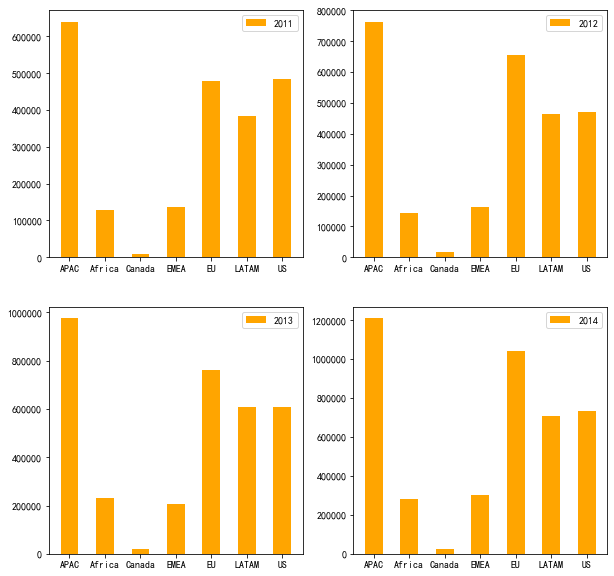

In [35]:
a = plt.figure(figsize=(10,10))
for i in range(2011, 2015):
    m = market_data[market_data.Order_year == i]
    ax = plt.subplot(220+i-2010)
    a = ax.bar(m.Market, m.Sales,width=0.5,color='orange', label=i)
    a = ax.legend()
del a

整体市场趋势不变,整体上升

### 市场总消费占比

In [36]:
market_sales_percentage = data.groupby('Market').agg({'Sales':'sum'})
market_sales_percentage['percentage(%)'] = market_sales_percentage.Sales / market_sales_percentage.Sales.sum()*100
# 降序排序
market_sales_percentage.sort_values('percentage(%)', ascending=False, inplace=True)
market_sales_percentage.style.background_gradient()

,Sales,percentage(%)
Market,,
APAC,3.58574e+06,28.3626
EU,2.93809e+06,23.2398
US,2.2972e+06,18.1705
LATAM,2.16461e+06,17.1217
EMEA,806161,6.3766
Africa,783773,6.19951
Canada,66928.2,0.52939


从图表可以看出:<br>
APAC(亚太地区)、EU(欧盟)、US(美国)、LATAM(拉丁美洲)四部分市场占了80%以上的销售额<br>
Canada(加拿大)所占比例极低

## 用户分析

### 用户占比分析

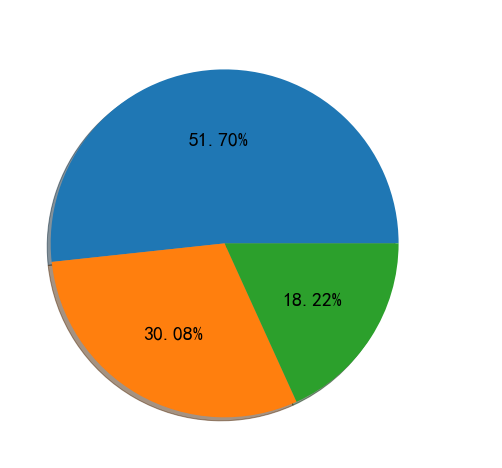

In [99]:
t = plt.figure(figsize=(10, 8))
t = plt.title('Segment', color='white', size=20)
t = plt.pie(data['Segment'].value_counts(), autopct='%0.2f%%', shadow=True, labels=data['Segment'].value_counts().index)
#修改标签大小
for i in t[1]:
    i.set_size(20)
    i.set_color('white')
for i in t[2]:
    i.set_size(20)
del t

普通消费者居多,占51.70%

### 查看用户数量增长情况

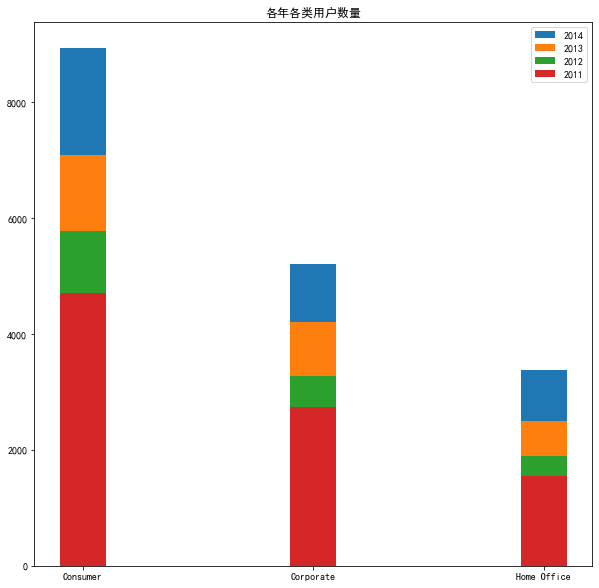

In [38]:
a = plt.figure(figsize=(10, 10))
a = plt.title('各年各类用户数量')
Segment_count = data.groupby(['Segment', 'Order_year']).count()['Customer_ID'].reset_index()
a = plt.bar('Segment', 'Customer_ID', width=0.2, data=Segment_count[Segment_count['Order_year']==2014], label=2014)
a = plt.bar('Segment', 'Customer_ID', width=0.2, data=Segment_count[Segment_count['Order_year']==2013], label=2013)
a = plt.bar('Segment', 'Customer_ID', width=0.2, data=Segment_count[Segment_count['Order_year']==2012], label=2012)
a = plt.bar('Segment', 'Customer_ID', width=0.2, data=Segment_count[Segment_count['Order_year']==2011], label=2011)
a = plt.legend()
del a

各类用户都在逐年增高

### 各类用户每年消费情况

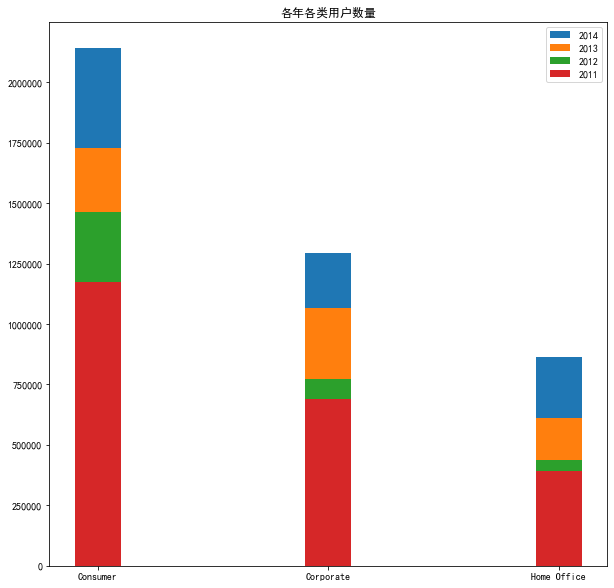

In [39]:
a = plt.figure(figsize=(10, 10))
a = plt.title('各年各类用户数量')
Segment_count = data.groupby(['Segment', 'Order_year']).sum()['Sales'].reset_index()
a = plt.bar('Segment', 'Sales', width=0.2, data=Segment_count[Segment_count['Order_year']==2014], label=2014)
a = plt.bar('Segment', 'Sales', width=0.2, data=Segment_count[Segment_count['Order_year']==2013], label=2013)
a = plt.bar('Segment', 'Sales', width=0.2, data=Segment_count[Segment_count['Order_year']==2012], label=2012)
a = plt.bar('Segment', 'Sales', width=0.2, data=Segment_count[Segment_count['Order_year']==2011], label=2011)
a = plt.legend()
del a

各类用户的消费额每年都在增高,普通用户消费和增长都是最高的

## 用户行为分析

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 25 columns):
Row_ID            51290 non-null int64
Order_ID          51290 non-null object
Order_Date        51290 non-null datetime64[ns]
Ship_Date         51290 non-null object
Ship_Mode         51290 non-null object
Customer_ID       51290 non-null object
Customer_Name     51290 non-null object
Segment           51290 non-null object
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Market            51290 non-null object
Region            51290 non-null object
Product_ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product_Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null float64
Shipping_Cost     51290 non-null float64
O

In [41]:
Customer_group = data[['Customer_ID', 'Order_Date', 'Sales', 'Quantity', 'Order_month']].sort_values('Order_Date').groupby('Customer_ID')
Customer_group.head()

,Customer_ID,Order_Date,Sales,Quantity,Order_month
0,TB-11280,2011-01-01,408.300,2,1
1,JH-15985,2011-01-01,120.366,3,1
2,AT-735,2011-01-01,66.120,4,1
3,EM-14140,2011-01-01,44.865,3,1
4,JH-15985,2011-01-01,113.670,5,1
...,...,...,...,...,...
43838,AD-180,2014-12-26,275.712,4,12
43902,DB-3555,2014-12-26,18.180,1,12
43878,AD-180,2014-12-26,158.760,2,12
43914,AD-180,2014-12-26,4.272,2,12


#### 最早一次购买

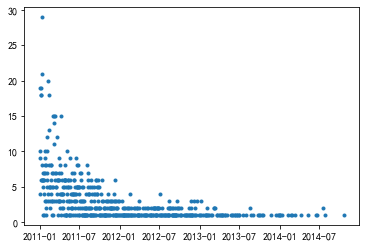

In [42]:
plt.plot(Customer_group.Order_Date.min().value_counts(),'.')

可以看出大多数集中在13年之前,也就是说13年之后的两年新客户很少

#### 最近一次购买

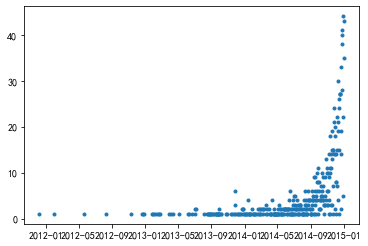

In [43]:
plt.plot(Customer_group.Order_Date.max().value_counts(),'.')

可以看出大部分都在最近购买东西,所以说明用户流失很少

## RFM模型分析

### 构建RFM表

In [65]:
rfm_data = data.pivot_table(values=['Order_Date', 'Quantity', 'Sales'], index=['Customer_ID'], aggfunc={'Order_Date' : 'max', 'Quantity' : 'sum', 'Sales' : 'sum'})
rfm_data['R'] = (rfm_data.Order_Date.max() - rfm_data.Order_Date)/np.timedelta64(1, 'D')
rfm_data.drop(columns=['Order_Date'], inplace=True)
rfm_data.rename(columns={'Quantity' : 'F', 'Sales' : 'M'}, inplace=True)
rfm_data = rfm_data.apply(lambda x: x-x.mean())
for i in rfm_data.columns:
    rfm_data[i] = rfm_data[i].map(lambda x: '1' if x > 0 else '0')
rfm_data

,F,M,R
Customer_ID,,,
AA-10315,1,1,0
AA-10375,1,0,0
AA-10480,1,1,1
AA-10645,1,1,0
AA-315,0,0,0
...,...,...,...
YS-21880,1,1,0
ZC-11910,0,0,1
ZC-21910,1,1,0


### 客户价值划分

In [69]:
def func(x):
    label = x.R+x.F+x.M
    d = {
        '111' : '重要价值',
        '110' : '一般价值',
        '101' : '重要挽留',
        '100' : '一般挽留',
        '011' : '重要保持',
        '010' : '一般保持',
        '001' : '重要发展',
        '000' : '一般发展',
    }
    label = d[label]
    return label
rfm_data['label'] = rfm_data.apply(func, axis=1)
rfm_data

,F,M,R,label
Customer_ID,,,,
AA-10315,1,1,0,重要保持
AA-10375,1,0,0,一般保持
AA-10480,1,1,1,重要价值
AA-10645,1,1,0,重要保持
AA-315,0,0,0,一般发展
...,...,...,...,...
YS-21880,1,1,0,重要保持
ZC-11910,0,0,1,一般挽留
ZC-21910,1,1,0,重要保持


In [74]:
rfm_data.groupby('label').count()['R']

label
一般价值      6
一般保持     49
一般发展    386
一般挽留    422
重要价值     43
重要保持    671
重要发展     10
重要挽留      3
Name: R, dtype: int64

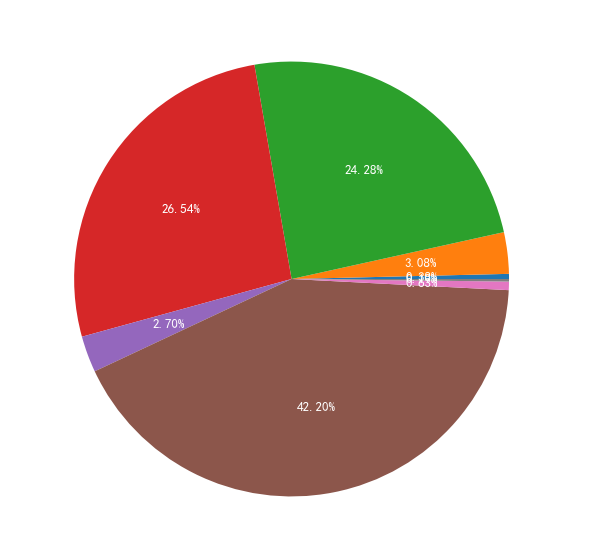

In [104]:
a = plt.figure(figsize=(10, 10))
a = plt.pie(rfm_data.groupby('label').count()['R'], autopct='%0.2f%%',labels=rfm_data.groupby('label').count()['R'].index)
for i in a[1]:
    i.set_size(15)
    i.set_color('white')
for i in a[2]:
    i.set_size(13)
    i.set_color('white')
del a

通过客户价值划分,可以根据客户标签,针对性的做出营销策略和个性化的沟通方式,大大降低成本,而且效果更好

# 总结

本项目从商品、市场、客户三个方向，按照时间序列的方式进行分析，并根据图表数据结果，做出了一定营销建议